In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score



In [2]:
data = pd.read_csv("F:\\project ai samani\\lab 1\\Social_Network_Ads.csv",engine='python',encoding='ISO-8859-1')

data.replace({'Male':-1, 'Female':1}, inplace=True)
data = data.drop(data.columns[0], axis=1)
data = data.drop(data.columns[0], axis=1)

data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [14]:
data.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [13]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data[["Age","EstimatedSalary"]], \
    data[['Purchased']], test_size=0.33)
print(data.shape)

(400, 3)


In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((268, 2), (132, 2), (268, 1), (132, 1))

In [5]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)

c:\Users\parsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

c:\Users\parsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\parsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\parsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\parsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: 

<Figure size 640x480 with 0 Axes>

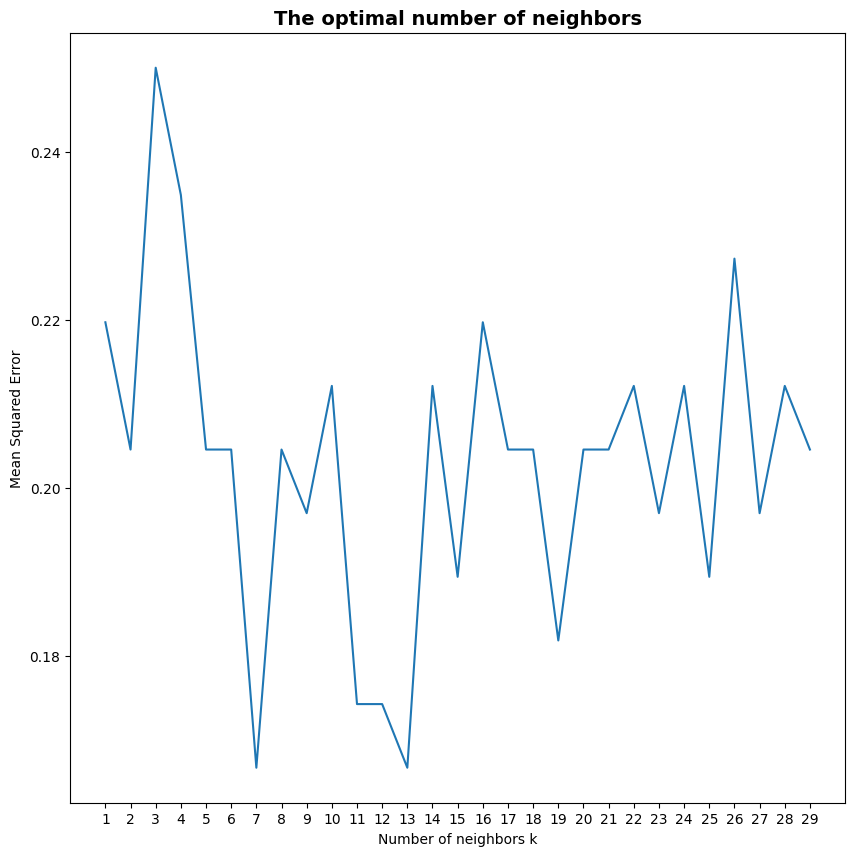

0.16666666666666666

In [6]:
k_range = range(1,30)
mse = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    mse.append(metrics.mean_squared_error(y_test, knn.predict(x_test)))
    
plt.figure()
plt.figure(figsize=(10,10))
plt.title('The optimal number of neighbors', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors k')
plt.ylabel('Mean Squared Error')
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))
plt.plot(k_range, mse)
plt.show()
min(mse)
    
    

In [10]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x_train, y_train)

c:\Users\parsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [11]:
# assume y_true is the actual values and y_pred is the predicted values
y_pred= model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print("Accuracy:", accuracy, "%")

Accuracy: 83.33333333333334 %


Purchased
0    87
1    45
Name: count, dtype: int64


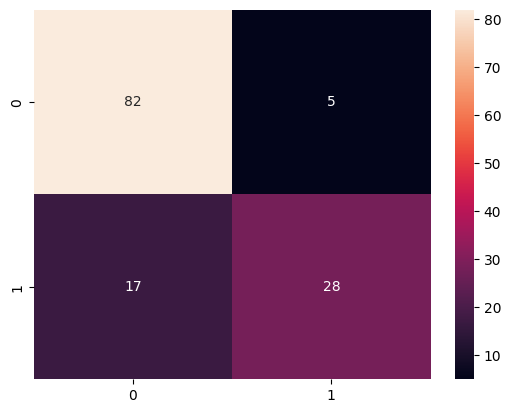

In [12]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)
print(y_test['Purchased'].value_counts())